## Evaluation of FucWf4 using DeepGlycanSite to predict key glycan binding residue sites 

Setup -- Relevant libraries and folder paths containing ligands and enzymes. 

In [32]:
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from python_on_whales import docker, Container, DockerClient

In [33]:
root_folder: Path = Path(__name__).parent.resolve()

compose_path: Path = Path(root_folder / "compose.yml")

ligands_folder: Path = Path(root_folder / "fucoidan_disaccharide_structures")
enzymes_folder: Path = Path(root_folder / "FucWf4-pdbs")

First, verification that our ligand files match our desired structures

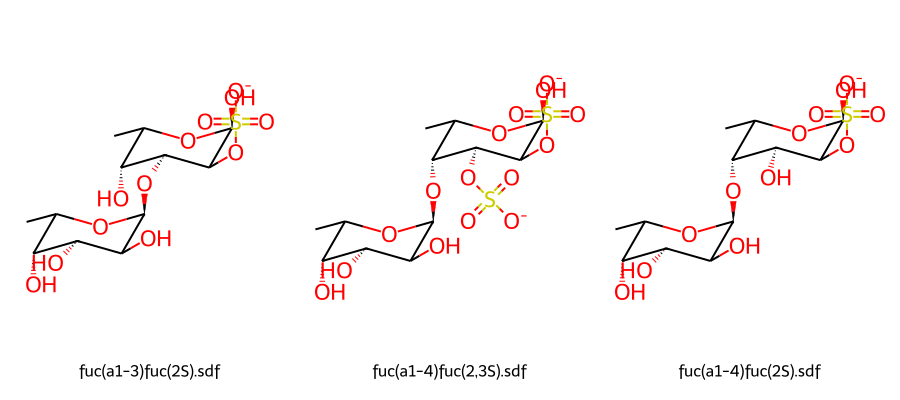

In [35]:
ligands_list = [ligand for ligand in os.listdir(ligands_folder) if ligand.startswith("fuc")]

mols = [Chem.SDMolSupplier(os.path.join(ligands_folder, ligand))[0] for ligand in ligands_list]

img = Chem.Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(300,400),
    legends=ligands_list
)

img

Ensure both FucWf4 and FucWf4-apo pdb files exist

In [36]:
ls FucWf4-pdbs

 Volume in drive C is Acer
 Volume Serial Number is 3889-C04B

 Directory of c:\Users\dar58\OneDrive\Documents\GitHub\docking_simulation_helpers\projects\FucWf4\FucWf4-pdbs

02/25/2025  10:19 AM    <DIR>          .
02/25/2025  01:53 PM    <DIR>          ..
02/17/2025  02:01 PM           640,566 FucWF4_apo.pdb
02/25/2025  10:19 AM         1,271,245 FucWf4_fuc.pdb
               2 File(s)      1,911,811 bytes
               2 Dir(s)  336,484,413,440 bytes free


In [37]:
docker_client = DockerClient(
    compose_files=["./compose.yml"]
)
docker_client

In [38]:
docker_client.compose.up(
    services="deepglycansite",
    detach=True
)

In [39]:
docker_client.compose.ps()

[python_on_whales.Container(id='9f9141c6f1ce', name='deepglycansite-fucwf4')]

In [40]:
config_file = "P2Y14_example/hparams.yaml"
checkpoint_path = "ckpts/with_ligand.ckpt"
output_directory = "workflow_data/outputs/"



In [41]:
for pdb_file in os.listdir(enzymes_folder):
    for sdf_file in ligands_list:
        output_filename = f"{pdb_file.split('.')[0]}-{sdf_file.split('.')[0]}.txt"
        
        
        command = [
            "python3",
            "single_case_prediction.py",
            "--conf", config_file,
            "--ckpt_path", checkpoint_path,
            "--input_fn", f"workflow_data/enzymes/{pdb_file},workflow_data/ligands/{sdf_file}",
            "--out_path", output_directory,
            "--output_fn", output_filename
        ]

        docker.container.execute(
            'deepglycansite-fucwf4',
            command=command
        )
        

        ### Some run situation in the docker container ###

        

DockerException: The command executed was `C:\Program Files\Docker\Docker\resources\bin\docker.EXE exec deepglycansite-fucwf4 python3 single_case_prediction.py --conf P2Y14_example/hparams.yaml --ckpt_path ckpts/with_ligand.ckpt --input_fn workflow_data/enzymes/FucWF4_apo.pdb,workflow_data/ligands/fuc(a1-3)fuc(2S).sdf --out_path workflow_data/outputs/ --output_fn FucWF4_apo-fuc(a1-3)fuc(2S).txt`.
It returned with code 137
The content of stdout is 'fused_multi_tensor is not installed corrected
fused_rounding is not installed corrected
fused_layer_norm is not installed corrected
fused_softmax is not installed corrected
Loading pretrained weights from /app/DeepGlycanSite/src/unimol_tools/weights/mol_pre_all_h_220816.pt
workflow_data/ligands/fuc(a1-3)fuc(2S).sdf
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
encountered unknown AA:  HOH  in the complex. Replacing it with a dash - .
'
The content of stderr is 'Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt
'


python_on_whales.Image(id='sha256:9b2aed5828a7c', tags=['drossotto/deepglycansite:latest'])

In [41]:
import random

# Example ligand shorthands
ligand_shorthands = ["Fuc(1-4)Fuc(2S)", "Fuc(1-4)Fuc(2,3S)", "Fuc(1-3)Fuc(2S)"]

# Example residues
residues = ["K77", "D43", "E45", "Y102", "M105", "N156", "Q169", "A285", "N287"]

# Generate binding probabilities randomly for each residue-ligand pair
data = {
    "residues": [],
    "binding probabilities": [],
    "ligands": []
}

for ligand in ligand_shorthands:
    for residue in residues:
        data["residues"].append(residue)
        data["binding probabilities"].append(round(random.uniform(0.3, 0.8), 4))  # Random probabilities between 0.3 and 0.8
        data["ligands"].append(ligand)

# Create DataFrame
df = pd.DataFrame(data)

# Display first few rows
print(df.head())


  residues  binding probabilities          ligands
0      K77                 0.3003  Fuc(1-4)Fuc(2S)
1      D43                 0.7728  Fuc(1-4)Fuc(2S)
2      E45                 0.7710  Fuc(1-4)Fuc(2S)
3     Y102                 0.5459  Fuc(1-4)Fuc(2S)
4     M105                 0.4630  Fuc(1-4)Fuc(2S)


C:\Users\dar58\AppData\Local\Temp\ipykernel_59684\35772912.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


<Axes: xlabel='binding probabilities', ylabel='residues'>

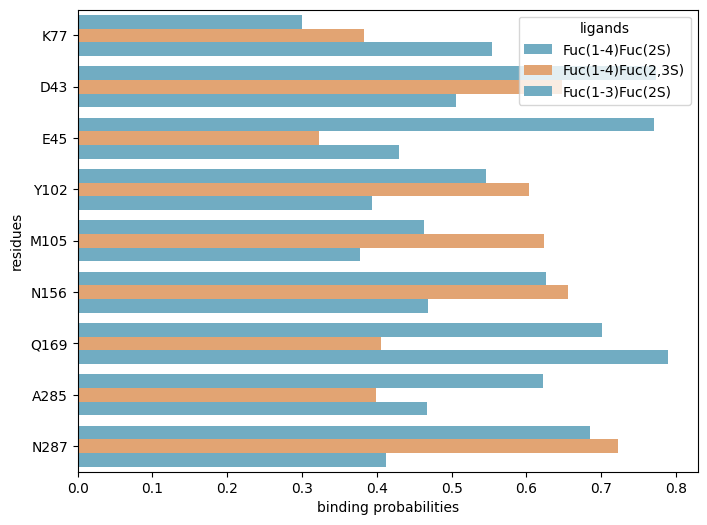

In [42]:
plt.figure(figsize=(8,6))

sns.barplot(
    data=df,
    x="binding probabilities",
    y="residues",
    hue="ligands",
    palette=["#63b3cf", "#f4a261"]
)